In [1]:
from pathlib import Path

import pandas as pd
import plotnine as p9
import plotly as pl
import plotly.offline as po
import plotly.graph_objs as pg


%load_ext autoreload
%autoreload 2
po.init_notebook_mode(connected=True)
DATA_DIR = Path('..')/'data'
OUT_DIR = Path('..')/'output'

/home/araichev/.virtualenvs/pyclub-RJlKEG3g/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Load data

In [2]:
# Auckland bicycle counts

path = DATA_DIR/'bicycle_counts_2017.csv'
f = (
    pd.read_csv(path, parse_dates=['datetime'])
    .assign(datetime=lambda x: x.datetime.dt.strftime('%Y-%m'))
)
f

,datetime,Beach Road,Carlton Gore Cycle Counter,Curran Street Shared Path,Dominion Rd City Bound,Dominion Road Outbound,Grafton Gully,Great North Rd City Bound,Great Nth Rd Sth Side,HighBrook,...,Pukekohe - Queen St,Quay St Spark Arena,Quay St Spark Arena Shared Pathway,Quay St Totem UZELT,Saint Lukes Rd NB,Saint Lukes Rd SB,Twin Streams,Upper Queen Street,Victoria Street West On Rd,Victoria Street West Shared Path
0,2017-01,10513,5807,7575.0,NaN,NaN,11730,3555,NaN,1176,...,NaN,8396,21611,29039,NaN,NaN,5836,3972,1644,1550.0
1,2017-02,10928,6870,6925.0,NaN,NaN,12476,3894,NaN,1418,...,NaN,8169,21217,28577,NaN,NaN,4108,4385,1872,1464.0
2,2017-03,12041,8387,6623.0,NaN,NaN,14160,4180,NaN,1288,...,NaN,7889,20443,27002,NaN,NaN,4214,5255,2070,1424.0
3,2017-04,9351,5821,6596.0,NaN,NaN,10688,3222,NaN,1040,...,NaN,7364,18638,25128,NaN,NaN,3935,3860,1512,1380.0
4,2017-05,10151,7772,5605.0,NaN,NaN,11986,3657,NaN,1112,...,NaN,7443,17556,23435,1638.0,1120.0,2698,4494,1804,1262.0
5,2017-06,8911,6425,4780.0,NaN,NaN,10026,3268,3597.0,1042,...,NaN,6469,14718,21044,2883.0,2029.0,2470,4245,1574,1260.0
6,2017-07,7144,5024,3789.0,NaN,925.0,8308,2779,4410.0,847,...,NaN,5769,12607,17672,2467.0,1732.0,2073,3131,1210,1032.0
7,2017-08,8113,6009,4596.0,3112.0,4373.0,10134,3356,4351.0,1031,...,NaN,6415,14767,20627,3063.0,2127.0,2228,3954,1300,1185.0
8,2017-09,8265,5617,5204.0,4142.0,3964.0,9162,3035,3431.0,924,...,NaN,6188,14232,19547,2871.0,1874.0,2374,3725,1309,1310.0
9,2017-10,9232,6153,5501.0,4602.0,4570.0,10920,3413,3578.0,937,...,NaN,7232,16484,23150,3320.0,2280.0,3276,4350,1489,1523.0


# Problem 2

  datetime     counter    count
0  2017-01  Beach Road  10513.0
1  2017-02  Beach Road  10928.0
2  2017-03  Beach Road  12041.0
3  2017-04  Beach Road   9351.0
4  2017-05  Beach Road  10151.0


/home/araichev/.virtualenvs/pyclub-RJlKEG3g/lib/python3.5/site-packages/plotnine/ggplot.py:688: UserWarning:

Saving 6.4 x 4.8 in image.

/home/araichev/.virtualenvs/pyclub-RJlKEG3g/lib/python3.5/site-packages/plotnine/ggplot.py:689: UserWarning:

Filename: ../output/bicycle_counts_plotnine.svg



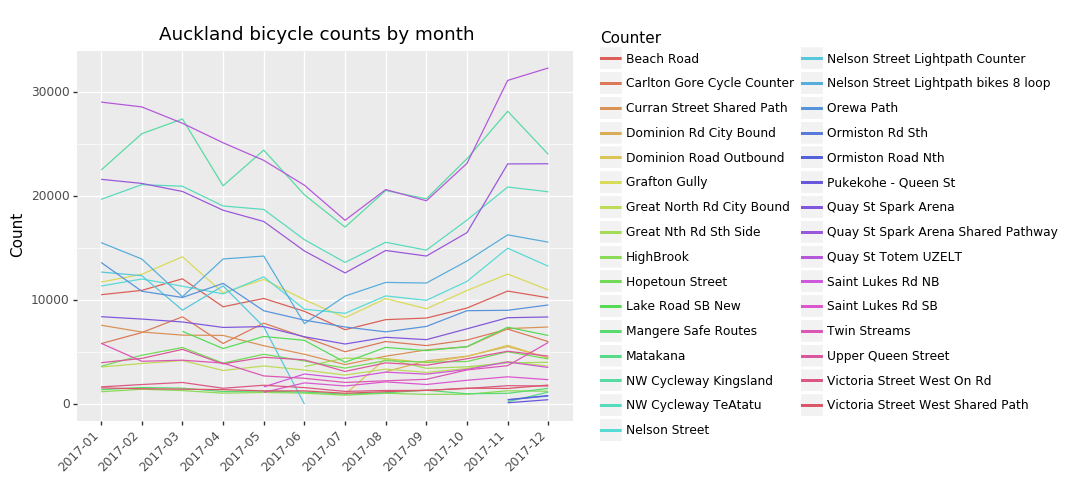

<ggplot: (8747614831336)>

In [3]:
# Use Plotnine to plot time series of the monthly bicycle counts.

# First need to put data in long format
counters = [c for c in f.columns if c != 'datetime']
g = (
    pd.melt(f, id_vars=['datetime'], value_vars=counters, 
      var_name='counter', value_name='count')
)
print(g.head())

# Create plot
plot = (
    p9.ggplot(g, p9.aes(x='datetime', y='count', color='counter', group='counter'))
    + p9.geom_line()
    + p9.labs(x='', y='Count', color='Counter', title='Auckland bicycle counts by month')
    + p9.theme(axis_text_x=p9.element_text(angle=45, hjust=1))
)

# Show plot and save to SVG
plot.save(str(OUT_DIR/'bicycle_counts_plotnine.svg'))
plot

# Problem 3

In [4]:
# Use Plotly to plot time series of the monthly bicycle counts.

# Create plot
counters = [c for c in f.columns if c != 'datetime']
data = [pg.Scatter(
    x=f.datetime, 
    y=f[counter], 
    name=counter,
    ) for counter in counters
]
layout = pg.Layout(
    title='Auckland bicycle counts by month',
    yaxis=dict(title='Count'),
    # Adding a legend title is hard work:
    annotations=[dict(
        x=1.17,
        y=1.07,
        align='right',
        valign='top',
        text='Counters',
        showarrow=False,
        xref='paper',
        yref='paper',
    )]
)
fig = dict(data=data, layout=layout)

# Show plot and save to SVG
po.iplot(fig, filename='bicycle_counts_plotly', image='svg')

In [5]:
# Alternatively, save the plot to HTML to preserve interactivity

path = OUT_DIR/'bicycle_counts_plotly.html'
po.plot(fig, filename=str(path), auto_open=False)

'file:///home/araichev/pyclub/output/bicycle_counts_plotly.html'